In [5]:
import kagglehub
import pandas as pd
import os
import numpy as np

# Tải dataset và lấy đường dẫn
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
print("Path to dataset files:", path)

# Tìm tệp CSV
for file in os.listdir(path):
    if file.endswith('.csv'):
        csv_path = os.path.join(path, file)
        break
else:
    print("Không tìm thấy tệp CSV trong thư mục.")
    exit()

# Đọc dữ liệu
data = pd.read_csv(csv_path)

# Bước 1: Xóa cột không cần thiết
# Xóa cột 'id' và bất kỳ cột nào có tên chứa 'Unnamed'
columns_to_drop = [col for col in data.columns if 'id' in col.lower() or 'unnamed' in col.lower()]
if columns_to_drop:
    data = data.drop(columns=columns_to_drop)
    print(f"\nĐã xóa các cột không cần thiết: {columns_to_drop}")
else:
    print("\nKhông có cột nào cần xóa.")

# Bước 2: Kiểm tra và xóa giá trị trùng lặp
duplicates = data.duplicated().sum()
if duplicates > 0:
    data = data.drop_duplicates()
    print(f"Đã xóa {duplicates} hàng trùng lặp.")
else:
    print("Không có hàng trùng lặp.")

# Bước 3: Kiểm tra và xử lý giá trị thiếu
missing_values = data.isnull().sum()
if missing_values.sum() > 0:
    print("\nCác cột chứa giá trị thiếu:\n", missing_values[missing_values > 0])
    data = data.dropna()
    print(f"Đã xóa các hàng chứa giá trị thiếu (tổng cộng {missing_values.sum()} giá trị).")
else:
    print("Không có giá trị thiếu.")

# Bước 4: Kiểm tra và xử lý giá trị bất thường (outliers)
# Kiểm tra các cột số để tìm giá trị âm (không hợp lý với đặc trưng vật lý)
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if (data[col] < 0).any():
        print(f"Cột {col} chứa giá trị âm, thay thế bằng NaN.")
        data[col] = data[col].mask(data[col] < 0, np.nan)
if data.isnull().sum().sum() > 0:
    data = data.dropna()
    print("Đã xóa các hàng chứa giá trị bất thường sau khi xử lý.")

# Bước 5: Mã hóa cột 'diagnosis'
if 'diagnosis' in data.columns:
    # Kiểm tra giá trị duy nhất trong cột diagnosis
    unique_values = data['diagnosis'].unique()
    print(f"Giá trị trong cột 'diagnosis': {unique_values}")
    if set(unique_values).issubset({'M', 'B'}):
        data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
        print("Đã mã hóa cột 'diagnosis' thành 0 (B) và 1 (M).")
    else:
        print("Cột 'diagnosis' chứa giá trị không hợp lệ, dừng xử lý.")
        exit()
else:
    print("Không tìm thấy cột 'diagnosis' trong dataset.")
    exit()

# Kiểm tra dữ liệu sau khi làm sạch
print("\nThông tin dataset sau khi làm sạch:")
print(data.info())
print("\n5 dòng đầu tiên:")
print(data.head())

# Lưu dataset sạch
output_path = 'breast_cancer_cleaned.csv'
data.to_csv(output_path, index=False)
print(f"\nĐã lưu dataset sạch vào '{output_path}'.")

Path to dataset files: C:\Users\Admin\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2

Đã xóa các cột không cần thiết: ['id', 'Unnamed: 32']
Không có hàng trùng lặp.
Không có giá trị thiếu.
Giá trị trong cột 'diagnosis': ['M' 'B']
Đã mã hóa cột 'diagnosis' thành 0 (B) và 1 (M).

Thông tin dataset sau khi làm sạch:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave po

In [2]:
import pandas as pd

# Đọc dữ liệu đã làm sạch
data = pd.read_csv('breast_cancer_cleaned.csv')

# Tính thống kê mô tả
description = data.describe()

# Hiển thị kết quả
print(description)

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

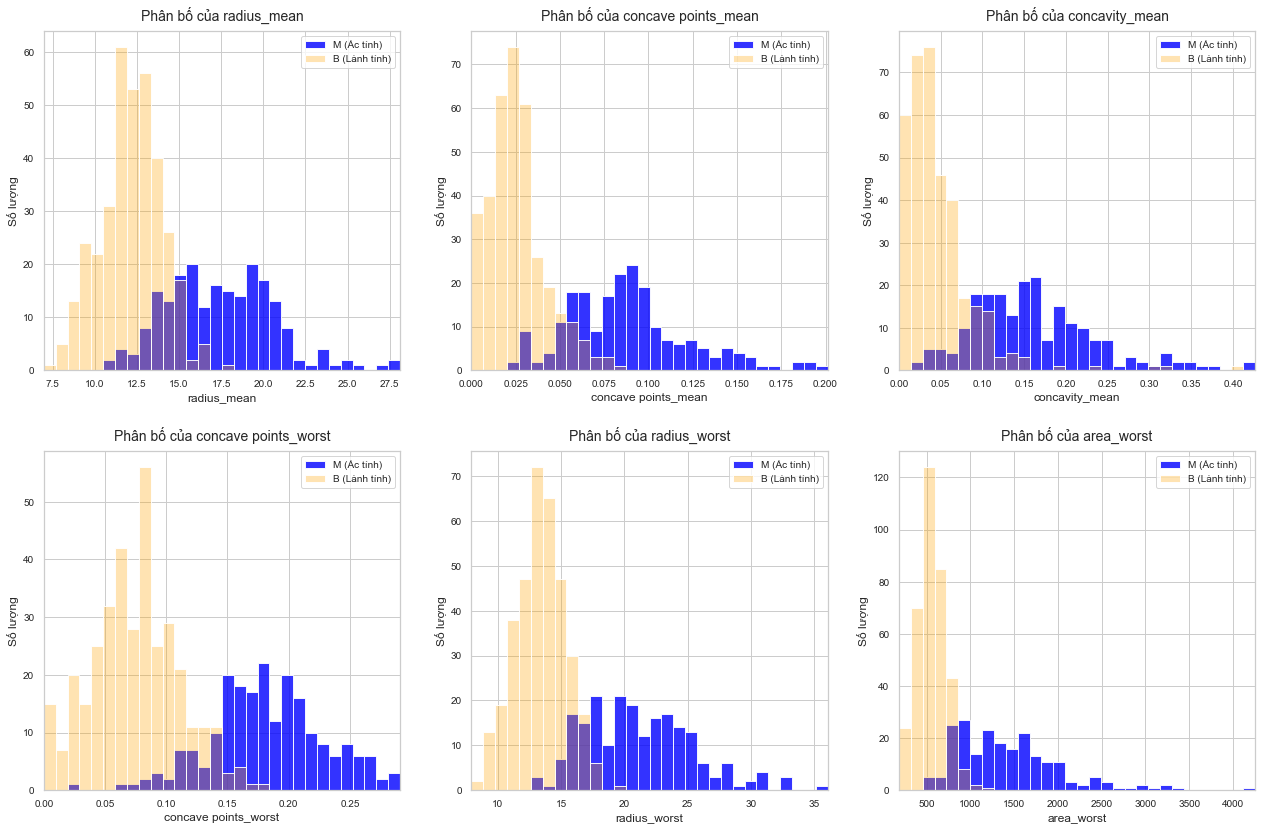

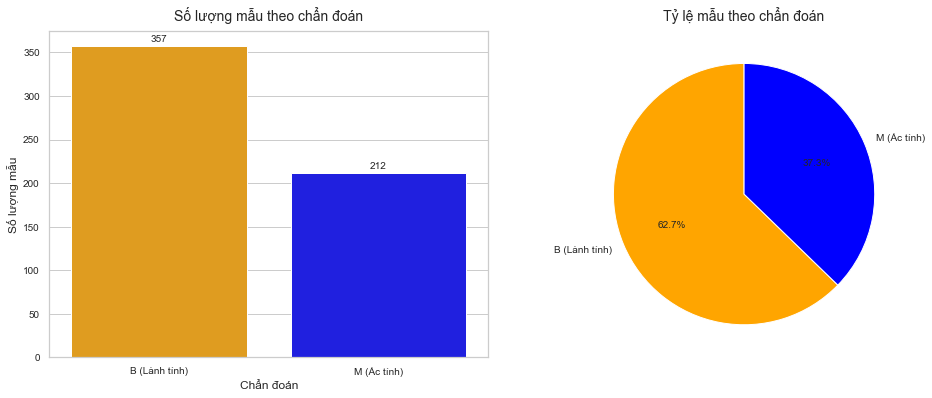

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Đọc dataset đã làm sạch
data = pd.read_csv('breast_cancer_cleaned.csv')

# Các đặc trưng được chọn
selected_features = ['radius_mean', 'concave points_mean', 'concavity_mean', 
                    'concave points_worst', 'radius_worst', 'area_worst']

# Thêm nhãn lớp dạng chữ để dễ đọc trên biểu đồ
data['diagnosis_label'] = data['diagnosis'].map({0: 'B (Lành tính)', 1: 'M (Ác tính)'})

# Đếm số lượng mẫu theo nhãn
diagnosis_counts = data['diagnosis_label'].value_counts()

# Thiết lập style cho seaborn
sns.set(style="whitegrid", palette="muted")

# 1. Histogram cho từng đặc trưng với làm mờ lớp "B (Lành tính)"
plt.figure(figsize=(18, 12))  # Tăng kích thước tổng thể của biểu đồ
for i, feature in enumerate(selected_features, 1):
    # Tạo subplot với kích thước lớn hơn
    ax = plt.subplot(2, 3, i)
    bin_edges = np.histogram_bin_edges(data[feature], bins=30)
    # Vẽ histogram với ranh giới bin chung
    sns.histplot(data=data[data['diagnosis_label'] == 'M (Ác tính)'], x=feature, color='blue', label='M (Ác tính)', bins=bin_edges, alpha=0.8, ax=ax)
    sns.histplot(data=data[data['diagnosis_label'] == 'B (Lành tính)'], x=feature, color='orange', label='B (Lành tính)', bins=bin_edges, alpha=0.3, ax=ax)
    plt.title(f'Phân bố của {feature}', fontsize=14, pad=10)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Số lượng', fontsize=12)
    plt.legend(fontsize=10)  # Tăng cỡ chữ chú thích
    # Đảm bảo phạm vi trục x phù hợp
    ax.set_xlim(data[feature].min(), data[feature].max())
    ax.tick_params(axis='both', labelsize=10)  # Tăng cỡ chữ số trên trục
plt.tight_layout(pad=2.0)  # Tăng khoảng cách giữa các subplot
plt.show()

# 2. Biểu đồ cột và biểu đồ tròn
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # Tăng kích thước tổng thể của biểu đồ

# Biểu đồ cột (Bar Plot)
colors_bar = ['blue' if label == 'M (Ác tính)' else 'orange' for label in diagnosis_counts.index]
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values, ax=ax1, palette=colors_bar)
ax1.set_title('Số lượng mẫu theo chẩn đoán', fontsize=14, pad=10)
ax1.set_xlabel('Chẩn đoán', fontsize=12)
ax1.set_ylabel('Số lượng mẫu', fontsize=12)
ax1.tick_params(axis='both', labelsize=10) 
for i, count in enumerate(diagnosis_counts.values):
    ax1.text(i, count + 5, str(count), ha='center', fontsize=10)

# Biểu đồ tròn (Pie Chart)
colors_pie = ['blue' if label == 'M (Ác tính)' else 'orange' for label in diagnosis_counts.index]
ax2.pie(diagnosis_counts.values, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=90, colors=colors_pie, textprops={'fontsize': 10})
ax2.set_title('Tỷ lệ mẫu theo chẩn đoán', fontsize=14, pad=10)

# Điều chỉnh layout
plt.tight_layout(pad=2.0)
plt.show()

Số thành phần chính được chọn: 10
Tổng tỷ lệ phương sai giải thích: 0.9516

Kết quả huấn luyện mô hình kNN với k=5 (weights='distance', algorithm='ball_tree'):
Accuracy: 0.9561
Precision: 0.9744
Recall: 0.9048
F1-Score: 0.9383

Báo cáo phân loại chi tiết:
               precision    recall  f1-score   support

lành tính (0)       0.95      0.99      0.97        72
  Ác Tính (1)       0.97      0.90      0.94        42

     accuracy                           0.96       114
    macro avg       0.96      0.95      0.95       114
 weighted avg       0.96      0.96      0.96       114


Ma trận nhầm lẫn:
[[71  1]
 [ 4 38]]


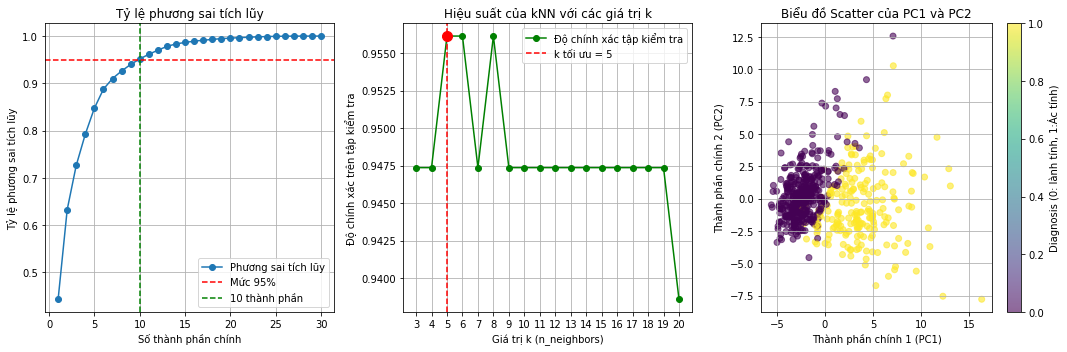

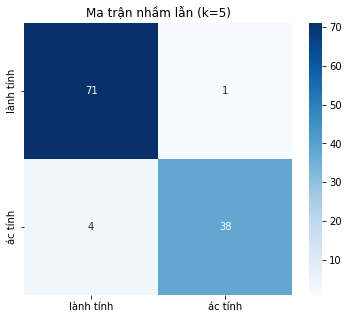

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Đọc dataset đã làm sạch
data = pd.read_csv('breast_cancer_cleaned.csv')

# Chọn tất cả đặc trưng trừ cột diagnosis
selected_features = [col for col in data.columns if col != 'diagnosis']
X = data[selected_features]
y = data['diagnosis']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Áp dụng PCA
pca = PCA().fit(X_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
if n_components == 0:  # Đảm bảo chọn ít nhất 1 thành phần
    n_components = 1

# Áp dụng PCA với số thành phần đã chọn
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# In thông tin PCA
print(f"Số thành phần chính được chọn: {n_components}")
print(f"Tổng tỷ lệ phương sai giải thích: {sum(pca.explained_variance_ratio_):.4f}")

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Danh sách các giá trị k từ 3 đến 20
k_values = range(3, 21, 1)
test_accuracies = []

# Huấn luyện và đánh giá mô hình kNN cho từng giá trị k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='ball_tree')
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Tìm giá trị k tối ưu
best_k = k_values[np.argmax(test_accuracies)]
best_accuracy = max(test_accuracies)

# Huấn luyện lại mô hình với k tối ưu
best_knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance', algorithm='ball_tree')
best_knn.fit(X_train, y_train)
y_test_pred = best_knn.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)  # Sửa lỗi cú pháp
conf_matrix = confusion_matrix(y_test, y_test_pred)

# In kết quả
print(f"\nKết quả huấn luyện mô hình kNN với k={best_k} (weights='distance', algorithm='ball_tree'):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nBáo cáo phân loại chi tiết:")
print(classification_report(y_test, y_test_pred, target_names=['lành tính (0)', 'Ác Tính (1)']))
print("\nMa trận nhầm lẫn:")
print(conf_matrix)

# Vẽ biểu đồ
plt.figure(figsize=(15, 5))

# 1. Biểu đồ phương sai tích lũy
plt.subplot(1, 3, 1)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', label='Phương sai tích lũy')
plt.axhline(y=0.95, color='r', linestyle='--', label='Mức 95%')
plt.axvline(x=n_components, color='g', linestyle='--', label=f'{n_components} thành phần')
plt.xlabel('Số thành phần chính')
plt.ylabel('Tỷ lệ phương sai tích lũy')
plt.title('Tỷ lệ phương sai tích lũy')
plt.grid(True)
plt.legend()

# 2. Biểu đồ độ chính xác theo k
plt.subplot(1, 3, 2)
plt.plot(k_values, test_accuracies, marker='o', linestyle='-', color='g', label='Độ chính xác tập kiểm tra')
plt.axvline(x=best_k, color='r', linestyle='--', label=f'k tối ưu = {best_k}')
plt.scatter(best_k, best_accuracy, color='r', s=100, zorder=5)
plt.title('Hiệu suất của kNN với các giá trị k', fontsize=12)
plt.xlabel('Giá trị k (n_neighbors)', fontsize=10)
plt.ylabel('Độ chính xác trên tập kiểm tra', fontsize=10)
plt.xticks(k_values)
plt.grid(True)
plt.legend()

# 3. Scatter plot PC1-PC2
plt.subplot(1, 3, 3)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.xlabel('Thành phần chính 1 (PC1)')
plt.ylabel('Thành phần chính 2 (PC2)')
plt.title('Biểu đồ Scatter của PC1 và PC2')
plt.colorbar(scatter, label='Diagnosis (0: lành tính, 1:Ác tính)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['lành tính', 'ác tính'], yticklabels=['lành tính', 'ác tính'])
plt.title(f'Ma trận nhầm lẫn (k={best_k})')
plt.show()